## Potato Disease Classification

### 0.Import Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'output/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 1721 images belonging to 3 classes.


In [3]:
train_generator.class_indices


{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [4]:
class_names = list(train_generator.class_indices.keys())
class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.8278471  0.8082393  0.82392555]
  [0.8278131  0.80820525 0.8238915 ]
  [0.8170024  0.7973946  0.81308085]
  ...
  [0.81568635 0.79215693 0.79215693]
  [0.8260593  0.8025299  0.8025299 ]
  [0.82745105 0.80392164 0.80392164]]

 [[0.8301848  0.810577   0.82626325]
  [0.83028674 0.8106789  0.8263652 ]
  [0.81656873 0.7969609  0.81264716]
  ...
  [0.81568635 0.79215693 0.79215693]
  [0.82616127 0.80263186 0.80263186]
  [0.82745105 0.80392164 0.80392164]]

 [[0.8196079  0.8000001  0.81568635]
  [0.8196079  0.8000001  0.81568635]
  [0.8092175  0.7896097  0.80529594]
  ...
  [0.81604594 0.7925165  0.7925165 ]
  [0.8230905  0.7995611  0.7995611 ]
  [0.823956   0.8004266  0.8004266 ]]

 ...

 [[0.6041442  0.56100696 0.5845364 ]
  [0.58449167 0.5413544  0.5648838 ]
  [0.59967667 0.5565394  0.5800688 ]
  ...
  [0.5995115  0.55637425 0.5720605 ]
  [0.58345485 0.5403176  0.55600387]
  [0.58338684 0.5402496  0.55593586]]

 [[0.5904061  0.54726887 0.5707983 ]
  [0.615743   0.5726057  0.59613514]


In [6]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'output/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'output/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.72760725 0.6609406  0.6973142 ]
  [0.6934122  0.6267455  0.664019  ]
  [0.65921706 0.5925504  0.6307238 ]
  ...
  [0.59654546 0.53380036 0.57301605]
  [0.65670705 0.5939619  0.63317764]
  [0.6231294  0.56038433 0.5996    ]]

 [[0.8799781  0.81331146 0.844684  ]
  [0.8921264  0.8254597  0.85683227]
  [0.9042746  0.8376079  0.86898047]
  ...
  [0.6158927  0.5531476  0.5923633 ]
  [0.6463585  0.5836134  0.6228291 ]
  [0.62852865 0.56578356 0.60499924]]

 [[0.76110244 0.6944358  0.7258083 ]
  [0.7777501  0.7110834  0.74245596]
  [0.79439765 0.727731   0.75910354]
  ...
  [0.6352399  0.5724948  0.6117105 ]
  [0.63601    0.5732649  0.6124806 ]
  [0.6339279  0.5711828  0.6103985 ]]

 ...

 [[0.41565612 0.33330315 0.36075413]
  [0.51615226 0.43379933 0.4612503 ]
  [0.6220224  0.53966945 0.56712043]
  ...
  [0.43027073 0.3479178  0.3832119 ]
  [0.43926945 0.3569165  0.39221063]
  [0.44826815 0.3659152  0.40120932]]

 [[0.42690447 0.34455153 0.3720025 ]
  [0.53055024 0.44819728 0.47564825]


#### Model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=10,
)

Epoch 1/10
47/47 [==============================] - 152s 3s/step - loss: 0.8938 - accuracy: 0.4770 - val_loss: 0.8726 - val_accuracy: 0.7031
Epoch 2/10
47/47 [==============================] - 136s 3s/step - loss: 0.8859 - accuracy: 0.5491 - val_loss: 0.8058 - val_accuracy: 0.7344
Epoch 3/10
47/47 [==============================] - 136s 3s/step - loss: 0.6032 - accuracy: 0.7428 - val_loss: 0.4966 - val_accuracy: 0.8073
Epoch 4/10
47/47 [==============================] - 134s 3s/step - loss: 0.4033 - accuracy: 0.8370 - val_loss: 0.2941 - val_accuracy: 0.8802
Epoch 5/10
47/47 [==============================] - 135s 3s/step - loss: 0.2975 - accuracy: 0.8844 - val_loss: 0.3558 - val_accuracy: 0.8281
Epoch 6/10
47/47 [==============================] - 133s 3s/step - loss: 0.3007 - accuracy: 0.8791 - val_loss: 0.3411 - val_accuracy: 0.8854
Epoch 7/10
47/47 [==============================] - 133s 3s/step - loss: 0.2317 - accuracy: 0.9102 - val_loss: 0.2313 - val_accuracy: 0.9271
Epoch 8/10
47

In [15]:
scores = model.evaluate(test_generator)
scores

7/7 [==============================] - 7s 1s/step - loss: 0.1390 - accuracy: 0.9444


[0.13897214829921722, 0.9444444179534912]

#### Accuracy and Loss Curves

In [16]:
history.params


{'verbose': 1, 'epochs': 10, 'steps': 47}

In [17]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

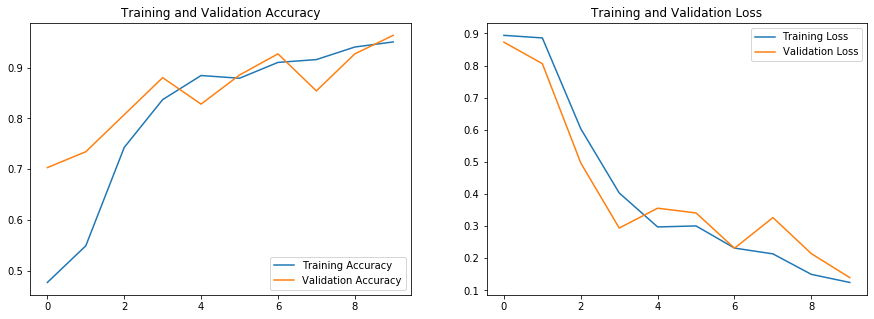

In [28]:
EPOCHS = 20

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot( loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Run prediction on a sample image


In [29]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

NameError: name 'labels_batch' is not defined

#### Write a function for inference


In [30]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

#### Now run inference on few sample images



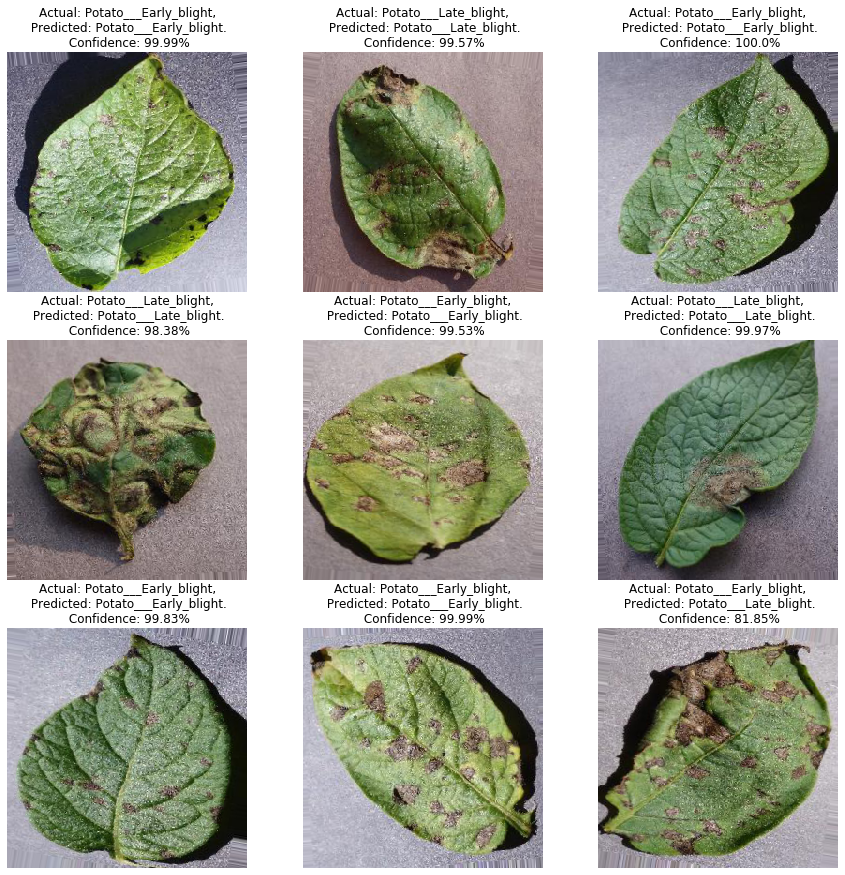

In [31]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [33]:
from sklearn.metrics import classification_report


#### Saving the Model


In [32]:
model.save("model.h5")